In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import math
from scipy import signal

In [3]:
duration_T = 5.5
resolution = 0.0001
spike_mat  = np.loadtxt('SpikeTimes.dat' , )/1000

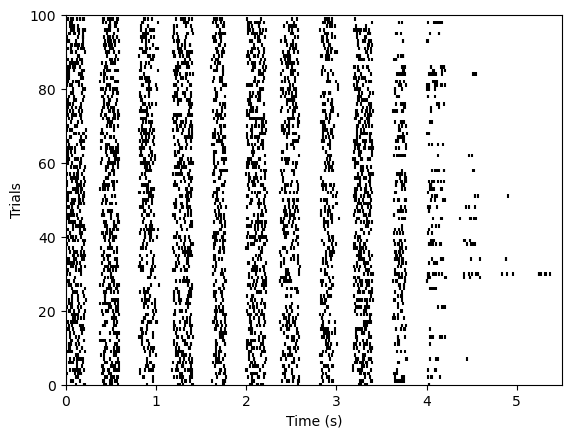

In [76]:
def raster_plot(train = spike_mat, duration = duration_T):
    # plots the spike train.
    fig, ax = plt.subplots()
    colors2 = 'black'
    lineoffsets2 = 1
    linelengths2 = 1
    ax.set_xlim((0,duration))
    ax.set_ylim((0,100))
   
    ax.eventplot(np.transpose(train), colors=colors2, lineoffsets=lineoffsets2,
                        linelengths=linelengths2, orientation= 'horizontal')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Trials')
    # ax.eventplot(train, lineoffsets=0.05,)

raster_plot()

In [35]:
# same func as cell below but much improved time complexity... In progress.
def get_intersection(train = spike_mat, duration = duration_T, num_trials=100):
    template_array = np.arange(0, duration,resolution)
    summation = np.zeros(template_array.shape)
    for trial in range(num_trials):
        
        mask = np.isin(template_array,train[:,trial], assume_unique= True,)*1
        
        summation = summation + mask
    average_response = summation/num_trials
    return average_response


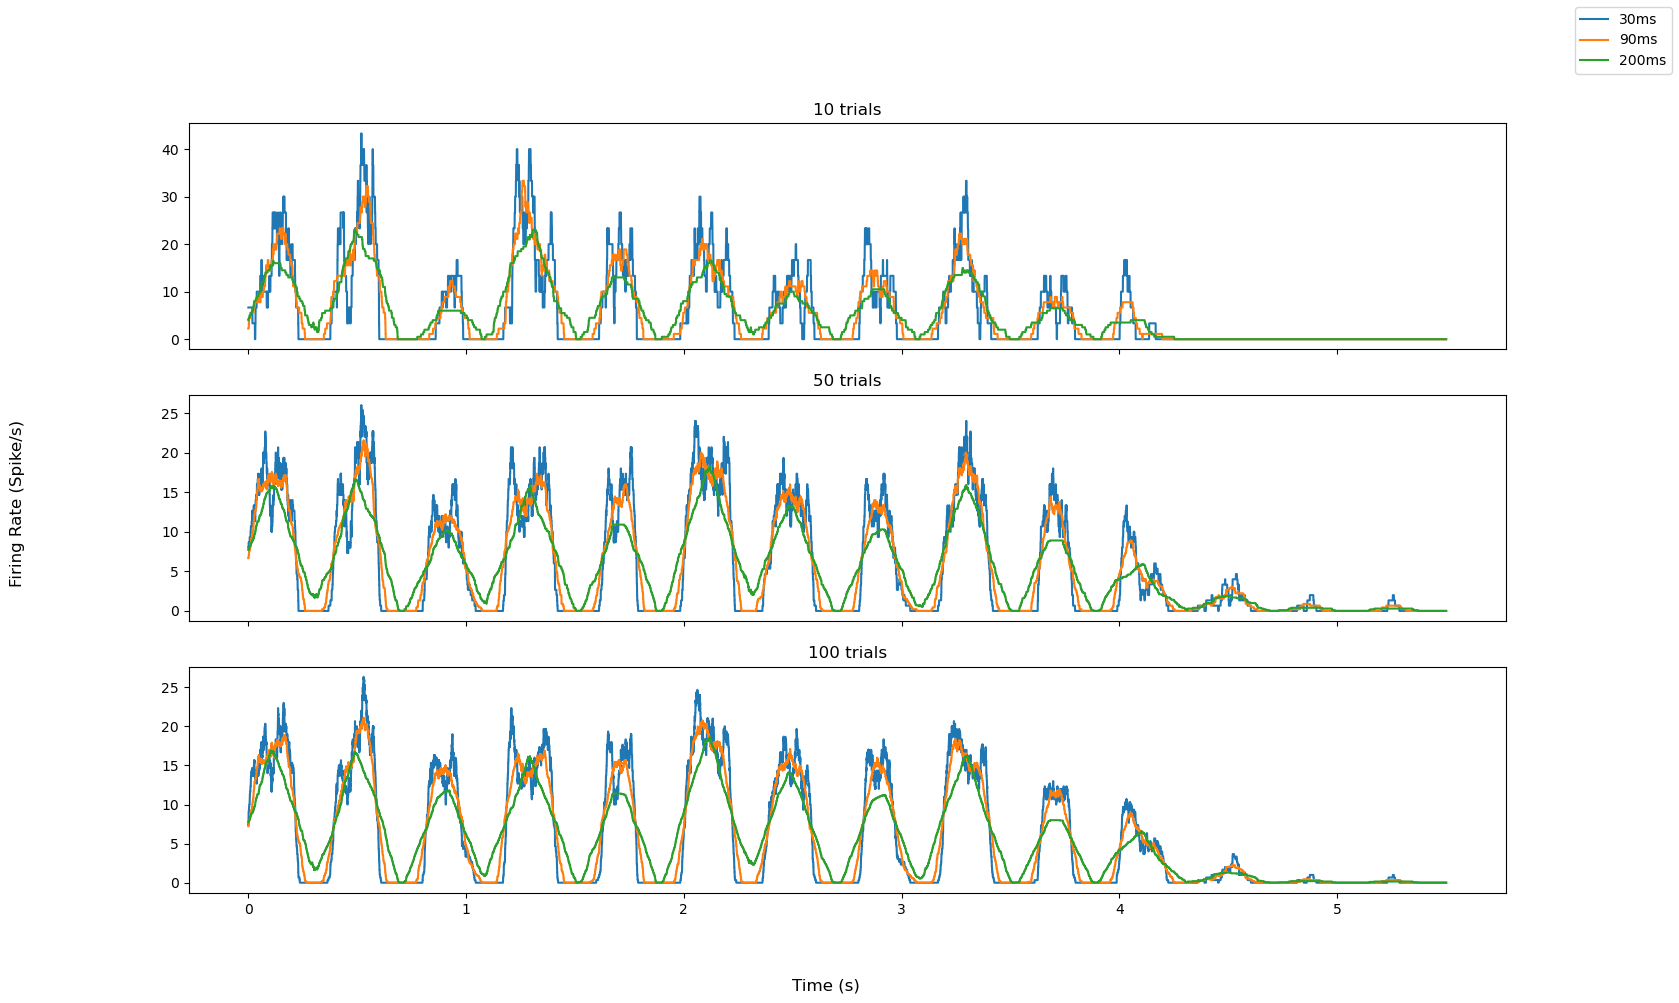

In [74]:
filter_widths = [0.03,0.09,0.2]
kernels = []

[kernels.append(np.ones(int(filter_width/resolution))/filter_width) for filter_width in filter_widths]
print()
average_response = np.array([get_intersection(train = spike_mat, duration = duration_T, num_trials=num_trials) for num_trials in [10,50,100]])

fig, axs = plt.subplots(3,1, sharex=True , figsize=(17,10),)

[axs[0].plot(np.arange(0, duration_T,resolution),np.convolve(average_response[0], square, mode= 'same')) for square in kernels]
axs[0].set_title("10 trials")
[axs[1].plot(np.arange(0, duration_T,resolution),np.convolve(average_response[1], square, mode= 'same')) for square in kernels]
axs[1].set_title("50 trials")
[axs[2].plot(np.arange(0, duration_T,resolution),np.convolve(average_response[2], square, mode= 'same')) for square in kernels]
axs[2].set_title("100 trials")

fig.supxlabel('Time (s)')
fig.supylabel('Firing Rate (Spike/s)')
plt.figlegend(['30ms','90ms','200ms'])

## Task 2

In [8]:
from scipy import io

In [9]:
sta_data = io.loadmat('STA_data.mat')
print(sta_data['SpikeTimes'].shape)
print(sta_data['Stimulus'].shape)

(744, 100)
(1, 10000)


Text(0, 0.5, 'Firing rate (spike/s)')

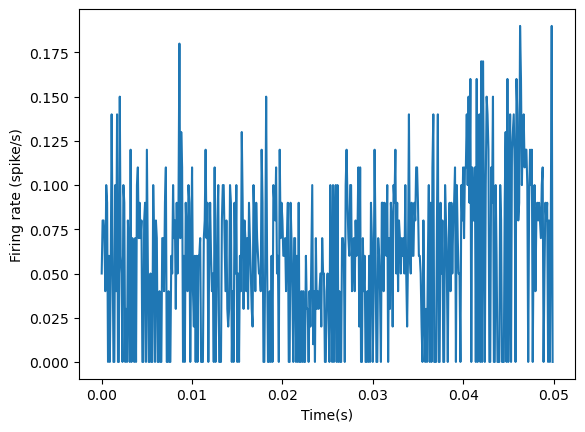

In [85]:
# same func as cell below but much improved time complexity... In progress.
def get_intersection(train = spike_mat, duration = duration_T, num_trials=100):
    template_array = np.arange(0, duration,resolution) # 0 ,0.0001, 
    summation = np.zeros(template_array.shape)
    for trial in range(num_trials):
        
        mask = np.isin(template_array,train[:,trial], assume_unique= True,)
        
        summation = summation + mask
    average_response = summation/num_trials
    return average_response
average_response = get_intersection(train = sta_data['SpikeTimes']/1000, duration = 1, )
fig, ax = plt.subplots()
ax.plot(np.arange(0, 0.05,resolution), average_response[:int(0.05/resolution)])
ax.set_xlabel('Time(s)')
ax.set_ylabel('Firing rate (spike/s)')



In [27]:
avergae_n = np.average(np.zeros(100)+744 - np.count_nonzero( np.isnan(sta_data['SpikeTimes']), axis = 0))

In [33]:
spike_triggered_average = np.correlate(average_response, sta_data['Stimulus'][0,:]/1000, mode='same') * 1/avergae_n

(0.05, 0.0)

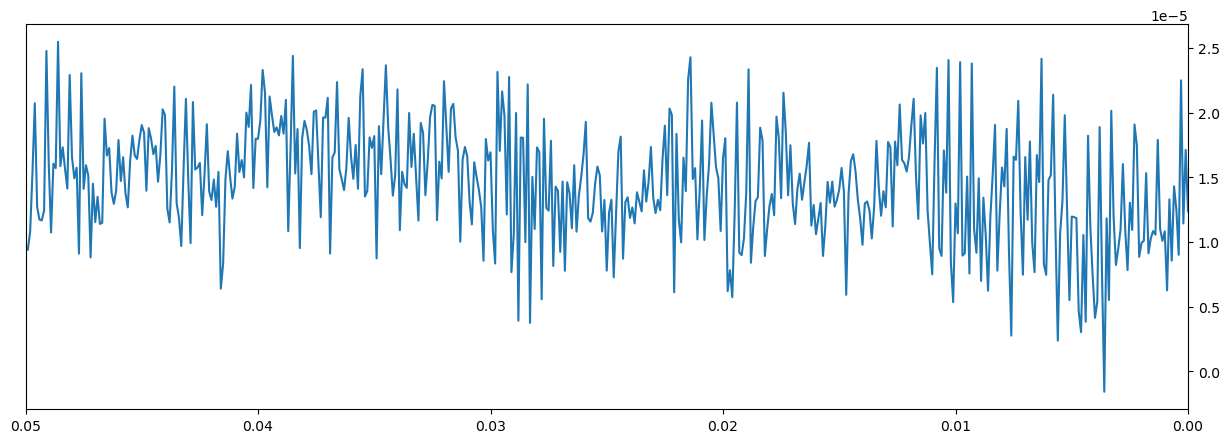

In [58]:
time = np.arange(0,0.05,0.0001)


f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
# plt.figure()
ax.yaxis.tick_right()
fig.supxlabel('Time (s)')
fig.supylabel('Spike triggered average')
ax.plot(time,spike_triggered_average[time.shape[0]:0:-1])
ticks = [0.0,0.01,0.02,0.03,0.04,0.05]
ax.set_xticks(ticks)
ax.set_xlim(np.max(ticks),np.min(ticks))



The implementation of the correlation is much faster, since the other method loops over each spike for each time point, so it scales very badly with # spikes and # time points. O(n*m), where n is number of time points, and m is number of spikes in each trial, which actually scales with n (for example, if you record for 10 times longer, then you will likely have 10 times more spikes in each trial, if the firing rate is constant).